# Data Exploration

- Pitch control clips
- annotated clips

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import copy

In [2]:
import sys  
sys.path.insert(0, '/Volumes/Transcend/DataScience/data_bootcamp/data/cap_data')

In [3]:
import Metrica_IO_CF as mio
import Metrica_Viz_CF as mviz
import Metrica_Velocities_CF as mvel
import matplotlib.animation as manimation
import Metrica_PitchControl_CF as mpc

In [4]:
DATADIR = "/Volumes/Transcend/DataScience/data_bootcamp/data/cap_data"

In [5]:
game_id='/game_1'

In [6]:
good_events=pd.read_csv(DATADIR+game_id+'/good_events.csv')

In [7]:
good_events=good_events.rename(columns={'Unnamed: 0':'event_num'}).set_index('event_num')

In [8]:
good_events_bad_label=pd.read_csv(DATADIR+game_id+'/good_events_wrong_label.csv')

In [9]:
good_events_bad_label=good_events_bad_label.rename(columns={'Unnamed: 0':'event_num'}).set_index('event_num')

In [10]:
good_events=good_events.drop('ball_speed_x',axis=1).rename(columns={'ball_speed_y':'ball_speed'})

In [11]:
good_events_bad_label=good_events_bad_label.drop('ball_speed_x',axis=1).rename(columns={'ball_speed_y':'ball_speed'})

In [12]:
events=pd.concat([good_events,good_events_bad_label])

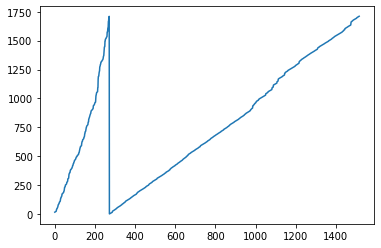

In [13]:
plt.plot(events.index)

### Events need to be reordered

In [14]:
events=events.reset_index().sort_values(by='event_num').set_index('event_num')

## Read in Tracking data

In [15]:
tracking_home=pd.read_csv(DATADIR+game_id+'/tracking_home.csv')
tracking_away=pd.read_csv(DATADIR+game_id+'/tracking_away.csv')

In [16]:
tracking_home=tracking_home.set_index('frameIdx')

In [17]:
tracking_away=tracking_away.set_index('frameIdx')

In [18]:
tracking_home['Team']='Home'
tracking_away['Team']='Away'

In [19]:
tracking_all=tracking_home.reset_index().merge(tracking_away.reset_index().drop(['Time [s]','Period','ball_x',
                                                                                 'ball_y','ball_z','ball_speed'],axis=1),how='left',on='frameIdx')

In [20]:
team=[]
for i in range(len(tracking_all)):
    if tracking_all['Team_x'].iloc[i]=='Home':
        team.append('Home')
    else:
        team.append('Away')

In [21]:
tracking_all=tracking_all.drop(['Team_x','Team_y'],axis=1)

In [22]:
tracking_all['Team']=team

In [23]:
events[events['Subtype']=='Goal']

,Team,Type,From,To,Start X,Start Y,End X,End Y,Start Frame,Start Time [s],...,away_53_vy,away_56_vy,away_6_vy,away_7_vy,away_87_vy,away_9_vy,dist_btw,dist,new_event_end_x,new_event_end_y
event_num,,,,,,,,,,,,,,,,,,,,,
1271,Away,16,11.0,NaN,44.6101,-6.596,NaN,NaN,102161.0,4086.44,...,-1.250000,-1.500000,NaN,-3.464286,NaN,0.964286,NaN,1.076099,NaN,NaN
1314,Away,16,12.0,NaN,24.4701,-0.476,NaN,NaN,108011.0,4320.44,...,1.035714,-0.214286,NaN,0.607143,NaN,-1.607143,12.476702,16.446326,NaN,NaN


In [24]:
# put subtype at the end so I can see the output when I call a slice of the dataframe
lista=list(events.columns)
lista.remove('Subtype')
lista.append('Subtype')
events=events[lista]

In [25]:
events.loc[868:878]

,Team,Type,From,To,Start X,Start Y,End X,End Y,Start Frame,Start Time [s],...,away_56_vy,away_6_vy,away_7_vy,away_87_vy,away_9_vy,dist_btw,dist,new_event_end_x,new_event_end_y,Subtype
event_num,,,,,,,,,,,,,,,,,,,,,
868,Away,15,31.0,NaN,31.1163,-2.244,NaN,NaN,64182.0,2567.28,...,NaN,-2.035714,NaN,-1.714286,NaN,NaN,4.340170,NaN,NaN,Attempt_Saved
869,Home,10,6.0,NaN,36.3527,-6.188,NaN,NaN,64186.0,2567.44,...,NaN,-2.035714,NaN,-1.892857,NaN,2.386064,0.671338,NaN,NaN,Save
870,Home,6,6.0,NaN,33.7345,-4.216,NaN,NaN,64223.0,2568.92,...,NaN,-1.821429,NaN,-0.785714,NaN,12.119818,18.470809,NaN,NaN,Corner_Awarded
871,Away,6,31.0,NaN,33.7345,-4.216,NaN,NaN,64223.0,2568.92,...,NaN,-1.821429,NaN,-0.785714,NaN,NaN,18.470809,NaN,NaN,Corner_Awarded
872,Away,1,15.0,27.0,49.8465,-33.660,41.1863,8.568,65221.0,2608.84,...,NaN,1.428571,NaN,-2.607143,NaN,41.707391,1.689628,40.7798,10.208,Pass
873,Home,44,2.0,NaN,41.9919,9.792,NaN,NaN,65263.0,2610.52,...,NaN,2.035714,NaN,1.178571,NaN,NaN,10.974583,NaN,NaN,Aerial
874,Away,44,27.0,NaN,41.9919,9.792,NaN,NaN,65263.0,2610.52,...,NaN,2.035714,NaN,1.178571,NaN,30.976651,10.974583,NaN,NaN,Aerial
875,Away,1,27.0,29.0,41.1863,8.568,40.9849,5.100,65273.0,2610.92,...,NaN,2.142857,NaN,2.892857,NaN,32.503577,3.735628,42.0586,1.522,Pass
876,Home,61,2.0,NaN,42.7975,11.084,NaN,NaN,65278.0,2611.12,...,NaN,2.250000,NaN,3.357143,NaN,NaN,3.298365,NaN,NaN,Ball_touch


(<Figure size 864x576 with 1 Axes>, <AxesSubplot:>)

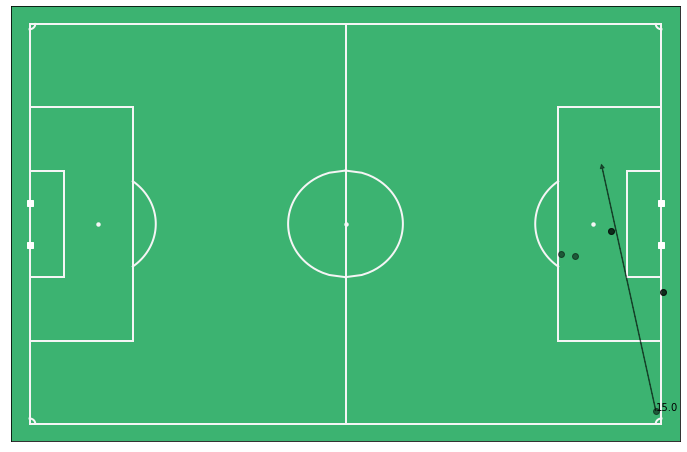

In [26]:
# plot the 3 events leading up to the first goal
mviz.plot_events(events.loc[868:874], color='k', indicators = ['Marker','Arrow'], annotate=True,adjust=True)

# Plot first goal - events

In [27]:
def isNaN(num):
    '''cute lil guy that determines if an element is nan or not'''
    return num != num

In [28]:
# first get pitch control model parameters
params = mpc.default_model_params()

In [30]:
events.loc[57:60]

,Team,Type,From,To,Start X,Start Y,End X,End Y,Start Frame,Start Time [s],...,away_56_vy,away_6_vy,away_7_vy,away_87_vy,away_9_vy,dist_btw,dist,new_event_end_x,new_event_end_y,Subtype
event_num,,,,,,,,,,,,,,,,,,,,,
57,Home,1,72.0,29.0,-20.3414,9.384,-41.4884,14.348,3827.0,153.08,...,NaN,-2.178571,NaN,-0.321429,NaN,0.77201,9.332431,-47.1170,6.904,Pass
58,Home,1,29.0,53.0,-41.4884,14.348,-40.3807,11.492,3894.0,155.76,...,NaN,-0.607143,NaN,0.107143,NaN,NaN,4.810160,-44.1423,8.494,Pass
59,Away,12,53.0,NaN,-42.0926,5.984,-18.2267,34.000,3927.0,157.08,...,NaN,0.607143,NaN,-0.214286,NaN,NaN,1.753556,-19.0941,32.476,Clearance
60,Home,5,29.0,NaN,-20.7442,34.952,NaN,NaN,3975.0,159.00,...,NaN,1.178571,NaN,1.071429,NaN,NaN,3.640595,NaN,NaN,Out


In [31]:
# find goalkeepers for offside calculation
GK_numbers = [mio.find_goalkeeper(tracking_home,3827),mio.find_goalkeeper(tracking_away,3827)]

In [32]:
GK_numbers

['18', '1']

----
CPU times: user 7.45 s, sys: 69.6 ms, total: 7.52 s
Wall time: 7.71 s


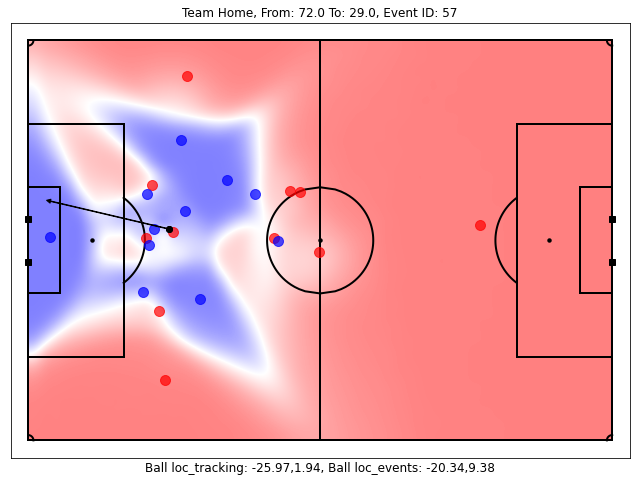

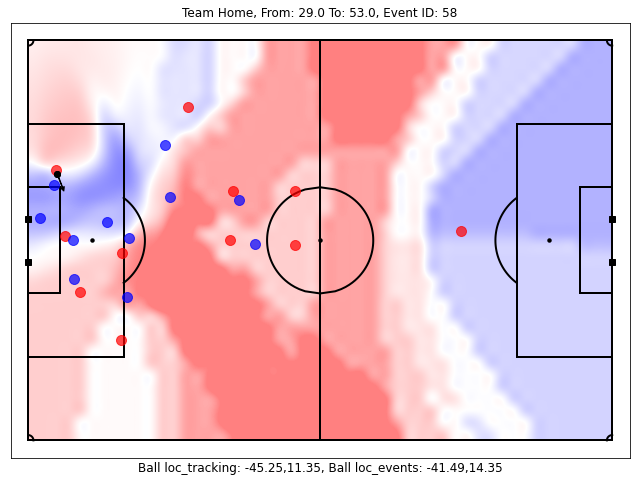

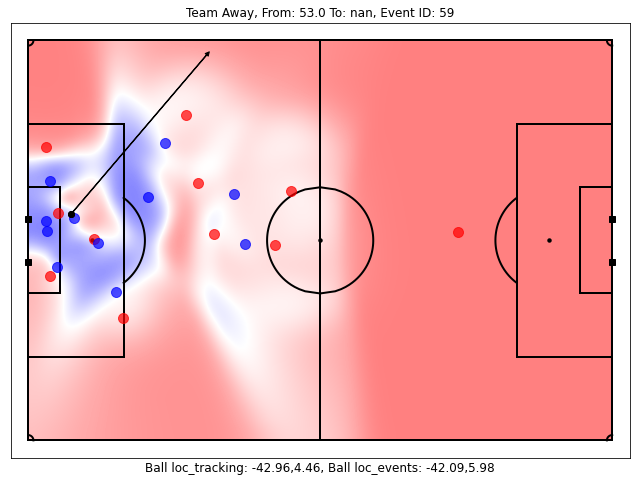

In [34]:
%%time
for i,row in events.loc[57:60].iterrows():
    if isNaN(row['End X']):
        print('----')
    else:
        # evaluated pitch control surface for each event
        event_frame=row['Start Frame']
        PPCF,xgrid,ygrid = mpc.generate_pitch_control_for_event(i, events, tracking_home, tracking_away, params, GK_numbers, n_grid_cells_x = 50,offsides=True,field_dimen=(100.6,68.9))
        fig, ax=mviz.plot_pitchcontrol_for_event(i, events,  tracking_home, tracking_away, PPCF, annotate=False,field_dimen=(100.6,68.9),include_player_velocities=False)
        ax.set_title("Team {}, From: {} To: {}, Event ID: {}".format(row['Team'],row['From'], row['To'],i))
        ax.set_xlabel("Ball loc_tracking: {},{}, Ball loc_events: {},{}".format(tracking_home['ball_x'].loc[event_frame],
                                                                                tracking_home['ball_y'].loc[event_frame],
                                                                                round(row['Start X'],2), round(row['Start Y'],2)),fontsize=12)



# Pitch surface clip function

In [ ]:
def save_pitch_clipping(full_tracking,hometeam,awayteam,save_path):
    #GK_numbers=
    index = hometeam.index
    for i in index:
        figobjs = [] # this is used to collect up all the axis objects so that they can be deleted after each iteration
        PPCF,xgrid,ygrid=mpc.generate_pitch_control_for_frame(i, full_tracking,hometeam, awayteam, params, GK_numbers, n_grid_cells_x = 75, offsides=True)
        fig, objs=mviz.plot_pitchcontrol_for_frame(i, hometeam, awayteam, PPCF, annotate=False,field_dimen=(100.6,68.7))
        fname='frame '+str(i) + '.png'
        fig.savefig(save_path+fname) 
        plt.clf()
        plt.close()

### Changing directory and storing clip

In [ ]:
cd
cd ../..
cd Volumes/Transcend
cd DataScience/data_bootcamp
cd data/cap_data/game_1
mkdir 'goal_clip_test2'
store_clip_path='/goal_clip_test2/'
DATADIR+game_id+store_clip_path

In [ ]:
# first get pitch control model parameters
params = mpc.default_model_params()

In [ ]:
events[events['Subtype']=='Goal']

Had to adjust find_goalkeeper function in .py file as the other one was not accurately finding them - had issues with nan values and also the coordinate system was throwing things off. Below is the function that replaced the old one

In [ ]:
# find goalkeepers for offside calculation
GK_numbers = [mio.find_goalkeeper(tracking_home,102100),mio.find_goalkeeper(tracking_away,102100)]

In [ ]:
GK_numbers

In [ ]:
events.shape

# PITCH CONTROL ANIMATION

In [ ]:
%%time
save_pitch_clipping(tracking_all,tracking_home.loc[102075:102175],tracking_away.loc[102075:102175],DATADIR+game_id+store_clip_path)

### Roughly a minute per frame

In [ ]:
from pathlib import Path
import imageio
path=DATADIR+game_id+store_clip_path
image_path = Path(path)
images = list(image_path.glob('*.png'))
image_list = []
for file_name in images:
    image_list.append(imageio.imread(file_name))

In [ ]:
imageio.mimwrite(path+'away_goal_clip_noannotate.gif', image_list)

In [ ]:
#Display the animation...
import io
import base64
from IPython.display import HTML
path=DATADIR+game_id+store_clip_path
filename = '/away_goal_clip_noannotate.gif'

video = io.open(path+filename, 'r+b').read()
encoded = base64.b64encode(video)
HTML(data='''<img src="data:image/gif;base64,{0}" type="gif" />'''.format(encoded.decode('ascii')))

# pillow animation writer is having trouble with the player velocities

This is only happening for game_1. game_2 seems to be fine - I'm guessing it has to do with the missing frames in the tracking data that was occuring in game 1 compared with game 2

In [ ]:
tracking_home.reset_index().loc[102075:102175]

In [ ]:
%%time
PLOTDIR = DATADIR+game_id
mviz.save_match_clip(tracking_home.reset_index().loc[101975:102175],tracking_away.reset_index().loc[101975:102175],PLOTDIR,fname='away_goal_track_ball',include_player_velocities=False, annotate=False,balltrack=True)


In [ ]:
#Display the animation...
import io
import base64
from IPython.display import HTML

filename = '/away_goal_track_ball.gif'

video = io.open(DATADIR+game_id+filename, 'r+b').read()
encoded = base64.b64encode(video)
HTML(data='''<img src="data:image/gif;base64,{0}" type="gif" />'''.format(encoded.decode('ascii')))